In [12]:
import os
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [13]:
eeci_colors = ['#E50068','#574145','#009070','#7500a0','#ffbfeb','#00C8A4','#a800e5','#4d4e51','#BEA5A9','#ebf1f7']

In [14]:
comp_results_file = os.path.join('..','results', 'prediction_tests_baseline.csv')
comp_results = pd.read_csv(comp_results_file)
de_results_file = os.path.join('..','results', 'prediction_tests_data_efficiency.csv')
de_results = pd.read_csv(de_results_file)

In [15]:
print(de_results)

     Model Name   Train Building  Forecast Time (s)  Tau (hrs)   Metric  \
0   linear-rd4y  same-train-test          25.194979         48   gmnMAE   
1   linear-rd4y  same-train-test          25.194979         48  gmnRMSE   
2   linear-rd2y  same-train-test          24.039610         48   gmnMAE   
3   linear-rd2y  same-train-test          24.039610         48  gmnRMSE   
4   linear-rd1y  same-train-test          23.730632         48   gmnMAE   
5   linear-rd1y  same-train-test          23.730632         48  gmnRMSE   
6   linear-rd6m  same-train-test          23.022696         48   gmnMAE   
7   linear-rd6m  same-train-test          23.022696         48  gmnRMSE   
8   linear-rd3m  same-train-test          23.720555         48   gmnMAE   
9   linear-rd3m  same-train-test          23.720555         48  gmnRMSE   
10  resmlp-rd4y  same-train-test          67.669290         48   gmnMAE   
11  resmlp-rd4y  same-train-test          67.669290         48  gmnRMSE   
12  resmlp-rd2y  same-tra

In [16]:
comp_models = ['linear', 'conv', 'resmlp', 'TFT', 'NHiTS', 'DeepAR']
model_names = ['Linear', 'Conv', 'ResMLP', 'TFT', 'NHiTS', 'DeepAR']
UCam_ids = [0,3,9,11,12,15,16,25,26,32,38,44,45,48,49]
columns = ['P','C','S',*['L%s'%id for id in UCam_ids]]
rds = ['rd4y','rd2y','rd1y','rd6m','rd3m']
rd_years = [4,2,1,0.5,0.25]

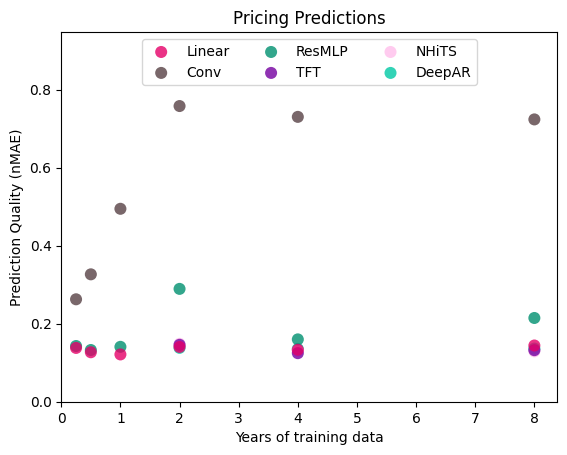

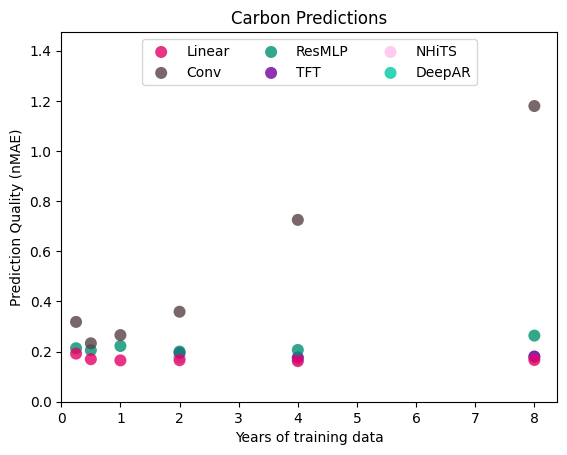

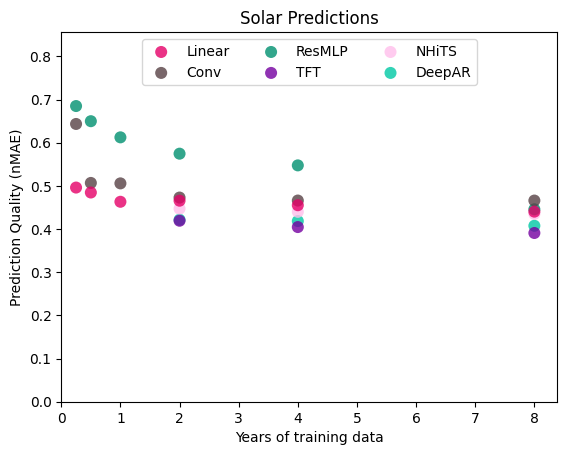

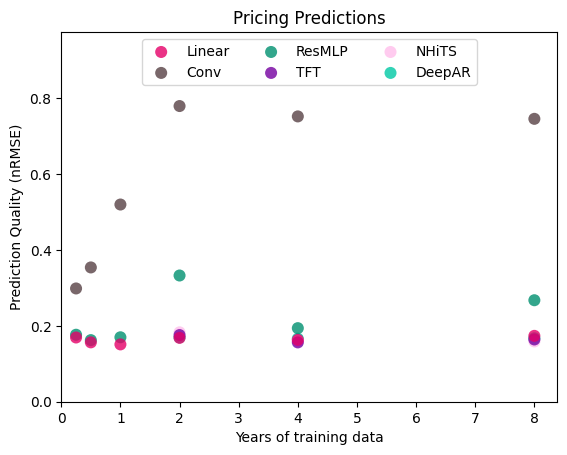

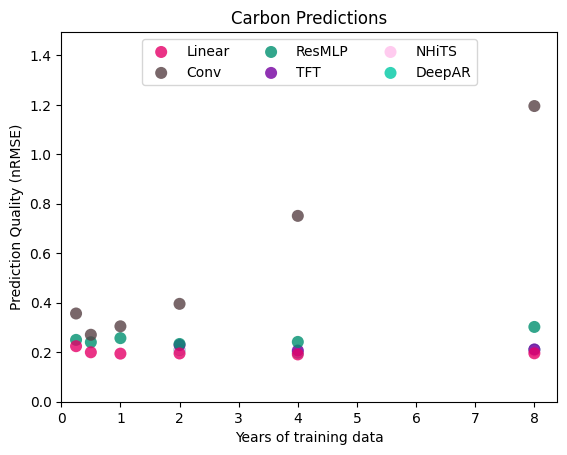

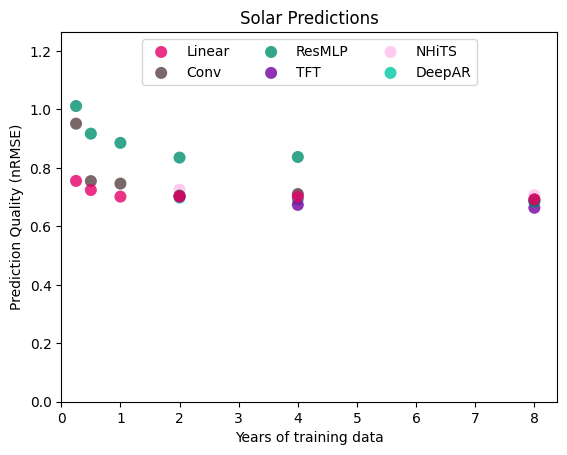

In [17]:
for metric, metric_name in zip(['gmnMAE','gmnRMSE'],['nMAE','nRMSE']):
    for var,var_name in zip(['P','C','S'],['Pricing','Carbon','Solar']):
        all_ys = []
        fig, ax = plt.subplots()
        for i,model in enumerate(comp_models):
            xs = [8,*rd_years]
            ys = [comp_results[(comp_results['Model Name']==model) & (comp_results['Metric']==metric)][var].iloc[0]] + [de_results[(de_results['Model Name']==model+'-'+rd) & (de_results['Metric']==metric)][var].iloc[0] for rd in rds if (model+'-'+rd) in de_results['Model Name'].to_list()]
            all_ys.extend(ys)
            ax.scatter(
                xs[:len(ys)], ys,
                label=model_names[i], zorder=len(comp_models)-i,
                color=eeci_colors[i], alpha=0.8, edgecolors='none',s=75
            )
        plt.xlim(0)
        plt.ylim(0,max(all_ys)*1.25)
        plt.xlabel('Years of training data')
        plt.ylabel(f'Prediction Quality ({metric_name})')
        plt.title('%s Predictions'%var_name)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True)
        plt.show()

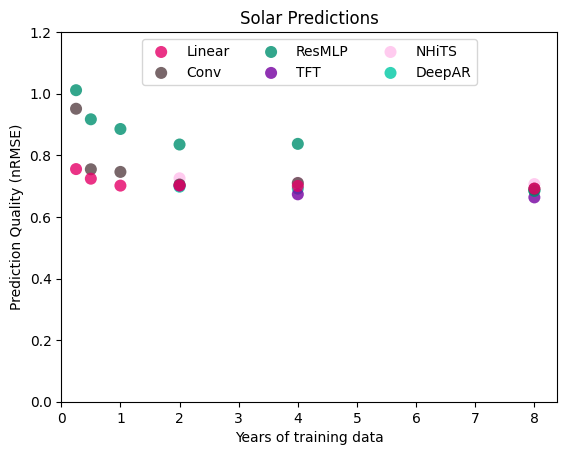

In [22]:
for metric, metric_name in zip(['gmnRMSE'],['nRMSE']):
    for var,var_name in zip(['S'],['Solar']):
        all_ys = []
        fig, ax = plt.subplots()
        for i,model in enumerate(comp_models):
            xs = [8,*rd_years]
            ys = [comp_results[(comp_results['Model Name']==model) & (comp_results['Metric']==metric)][var].iloc[0]] + [de_results[(de_results['Model Name']==model+'-'+rd) & (de_results['Metric']==metric)][var].iloc[0] for rd in rds if (model+'-'+rd) in de_results['Model Name'].to_list()]
            all_ys.extend(ys)
            ax.scatter(
                xs[:len(ys)], ys,
                label=model_names[i], zorder=len(comp_models)-i,
                color=eeci_colors[i], alpha=0.8, edgecolors='none',s=75
            )
        plt.xlim(0)
        plt.ylim(0,1.2)
        plt.xlabel('Years of training data')
        plt.ylabel(f'Prediction Quality ({metric_name})')
        plt.title('%s Predictions'%var_name)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True)
        plt.show()

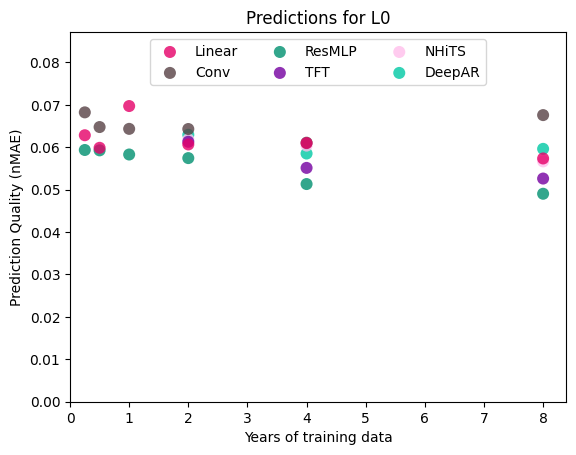

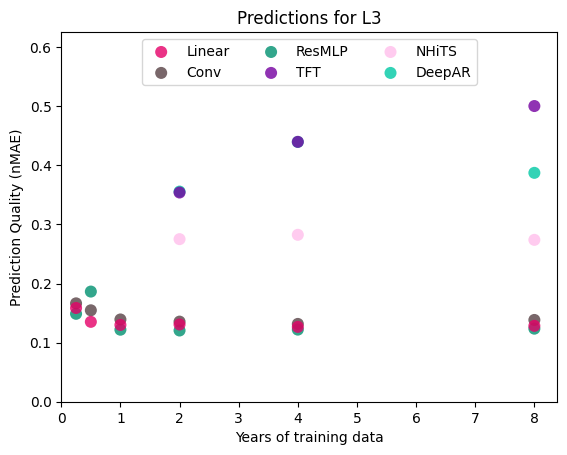

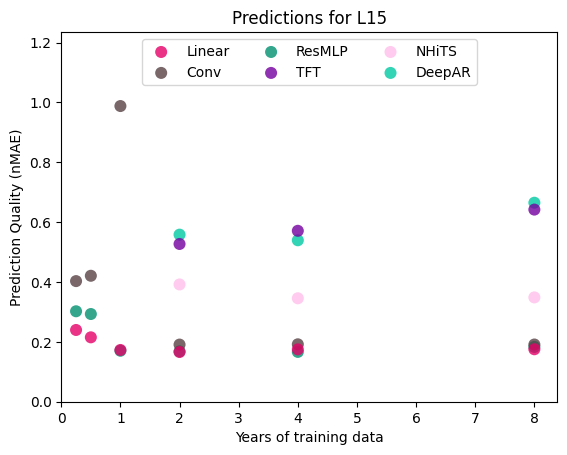

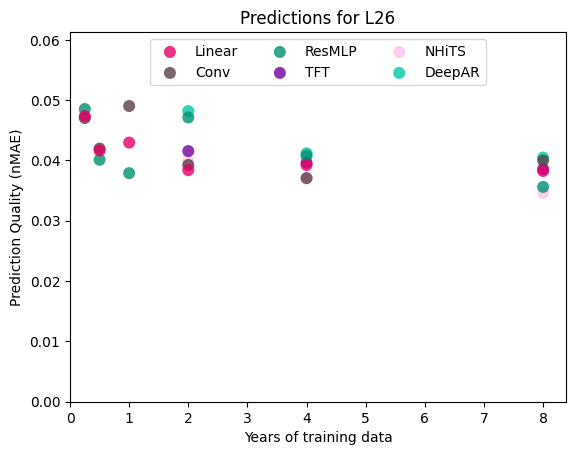

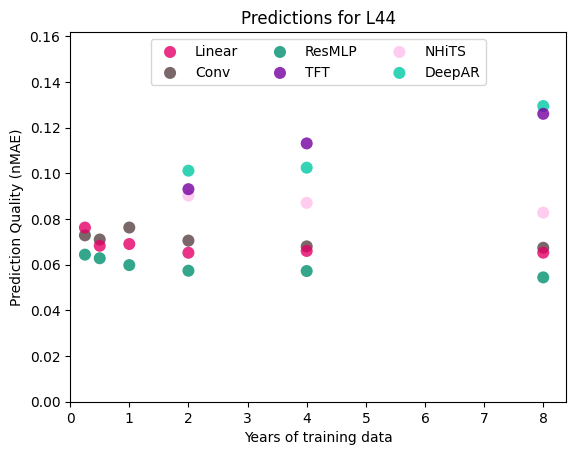

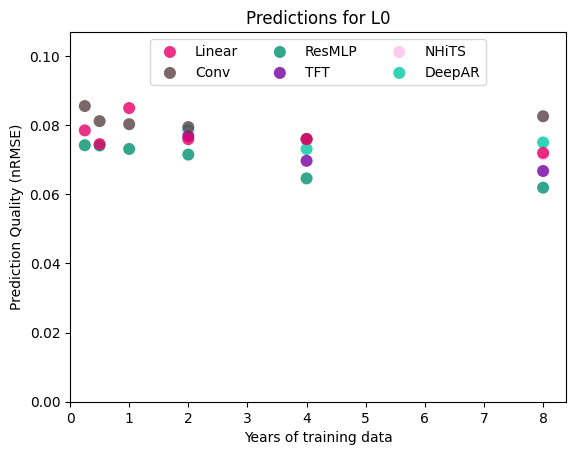

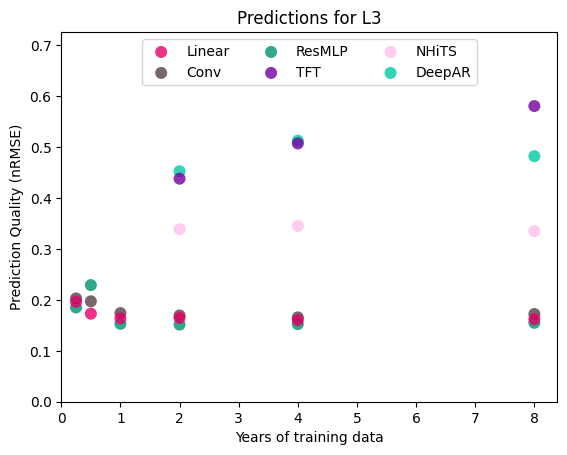

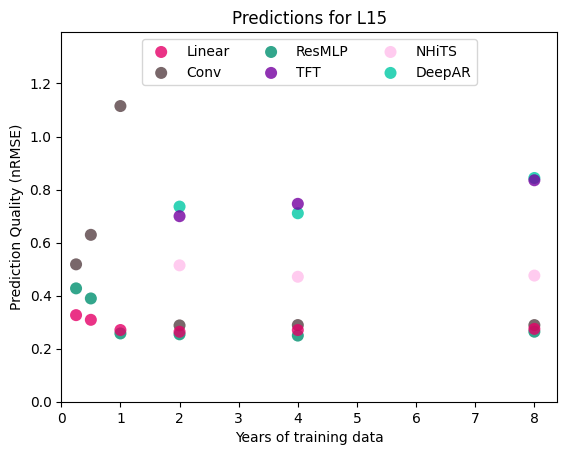

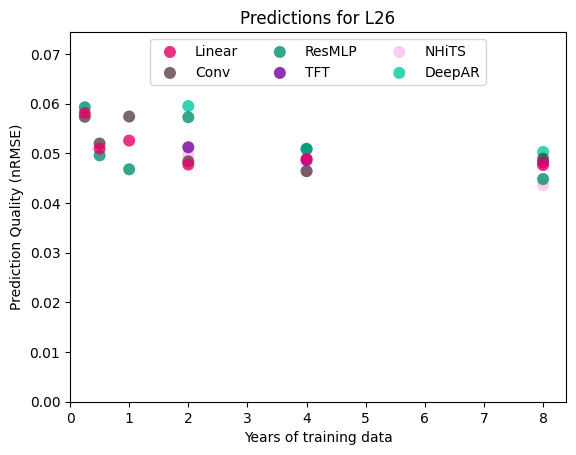

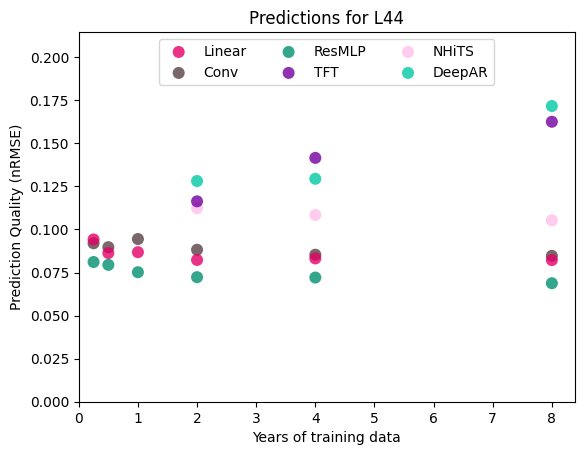

In [18]:
for metric, metric_name in zip(['gmnMAE','gmnRMSE'],['nMAE','nRMSE']):
    for var in ['L0','L3','L15','L26','L44']:
        all_ys = []
        fig, ax = plt.subplots()
        for i,model in enumerate(comp_models):
            xs = [8,*rd_years]
            ys = [comp_results[(comp_results['Model Name']==model) & (comp_results['Metric']==metric)][var].iloc[0]] + [de_results[(de_results['Model Name']==model+'-'+rd) & (de_results['Metric']==metric)][var].iloc[0] for rd in rds if (model+'-'+rd) in de_results['Model Name'].to_list()]
            all_ys.extend(ys)
            ax.scatter(
                xs[:len(ys)], ys,
                label=model_names[i], zorder=len(comp_models)-i,
                color=eeci_colors[i], alpha=0.8, edgecolors='none',s=75
            )
        plt.xlim(0)
        plt.ylim(0,max(all_ys)*1.25)
        plt.xlabel('Years of training data')
        plt.ylabel(f'Prediction Quality ({metric_name})')
        plt.title('Predictions for %s'%var)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True)
        plt.show()

In [19]:
np.mean(comp_results[(comp_results['Model Name']==model) & (comp_results['Metric']==metric)][['L%s'%id for id in UCam_ids]].iloc[0])

0.37424379543410774

In [20]:
print(model)

DeepAR


linear [0.12822313831445367, 0.1270364231863535, 0.12714399340021804, 0.13068391659330622, 0.133004740513757, 0.14387652143161814]
conv [0.17339468889701054, 0.18910144866010484, 0.1621869984631078, 0.2547092161581613, 0.2260063010943548, 0.21489161641281992]
resmlp [0.12130091974711844, 0.12189859120339129, 0.12640066941577907, 0.13026765458369455, 0.150899991372827, 0.15468582114491444]
TFT [0.29402014091862966, 0.2894083429131727, 0.2751831698154961]
NHiTS [0.22650372392373447, 0.23597882982155383, 0.2312475203280064]
DeepAR [0.29683335864024696, 0.2681505575855752, 0.28923491386013583]


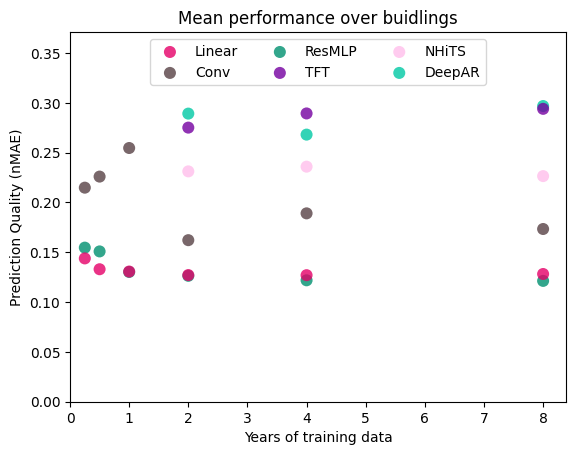

linear [0.17668860505142697, 0.17513981477077575, 0.17466611405238097, 0.17916898051232213, 0.1818497696790832, 0.1925345508219148]
conv [0.22819473273773372, 0.24220031295696234, 0.2106950659371936, 0.30883897555233253, 0.28871747237665984, 0.27183849353348116]
resmlp [0.1638868861805794, 0.1647199504235347, 0.1705424634406057, 0.1770271336036609, 0.19974356376864322, 0.20444299916990513]
TFT [0.37345263174866355, 0.36348452443078805, 0.35484137755698564]
NHiTS [0.2971765860148429, 0.30456126889712487, 0.29841271365240446]
DeepAR [0.37424379543410774, 0.34215501142195837, 0.36939714304558086]


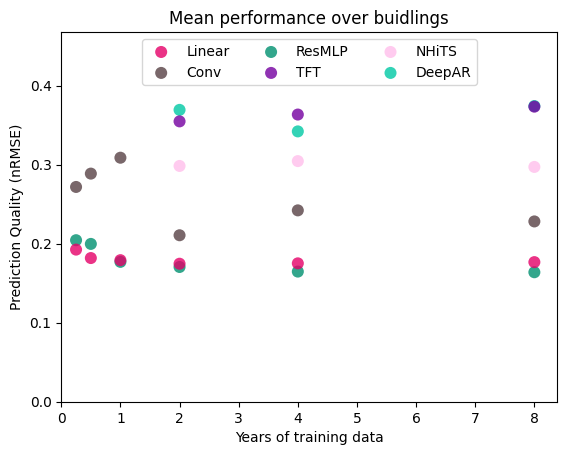

In [21]:
for metric, metric_name in zip(['gmnMAE','gmnRMSE'],['nMAE','nRMSE']):
    all_ys = []
    fig, ax = plt.subplots()
    for i,model in enumerate(comp_models):
        xs = [8,*rd_years]
        ys = [np.mean(comp_results[(comp_results['Model Name']==model) & (comp_results['Metric']==metric)][['L%s'%id for id in UCam_ids]].iloc[0])] +\
            [np.mean(np.ma.masked_invalid(de_results[(de_results['Model Name']==model+'-'+rd) & (de_results['Metric']==metric)][['L%s'%id for id in UCam_ids]].iloc[0])) for rd in rds if (model+'-'+rd) in de_results['Model Name'].to_list()]
        all_ys.extend(ys)
        ax.scatter(
            xs[:len(ys)], ys,
            label=model_names[i],zorder=len(comp_models)-i,
            color=eeci_colors[i], alpha=0.8, edgecolors='none',s=75
        )
        print(model,ys)
    plt.xlim(0)
    plt.ylim(0,max(all_ys)*1.25)
    plt.xlabel('Years of training data')
    plt.ylabel(f'Prediction Quality ({metric_name})')
    plt.title('Mean performance over buidlings')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True)
    plt.show()

Put in note that there are some buildings where performance is anomolously bad for certain reduce training datasets